In [113]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
from sklearn.utils import resample

In [114]:
def p(x: float) -> float:
    return np.exp(-x) if x >= 0 else 0

In [115]:
def F(x: float) -> float:
    return (1 - np.exp(-x)) if x >= 0 else 0

In [116]:
def F_rev(y: float) -> float:
    return -np.log(1-y)

In [117]:
def M_k(var_series, k):
    arr = np.array(var_series)
    return np.sum((arr - arr.mean())**k)/arr.size

## a
Определить по выборке моду, медиану, размах, оценку коэффициента асимметрии.

In [118]:
n = 25 # Объем выборки

np.random.seed(0)
sample = np.random.exponential(scale=1, size=n)

unique, counts = np.unique(sample, return_counts=True)
mode = unique[np.argwhere(counts == np.max(counts))]
print(f"Мода: {mode}")

median = np.median(sample)
print(f"Медиана: {median}")

ptp = np.ptp(sample)
print(f"Размах: {ptp}")

skew = ss.skew(sample)
print(f"Оценка коэффициента асимметрии: {skew}")

Мода: [[0.02042559]
 [0.07368535]
 [0.09116103]
 [0.12587441]
 [0.4836021 ]
 [0.55104849]
 [0.5755192 ]
 [0.61892946]
 [0.75267411]
 [0.78720115]
 [0.79587451]
 [0.83943285]
 [0.92322315]
 [1.03815929]
 [1.25593076]
 [1.50578423]
 [1.51653598]
 [1.56889614]
 [1.60523956]
 [1.78748768]
 [2.04031428]
 [2.22352441]
 [2.59825415]
 [3.31491218]
 [3.84522184]]
Медиана: 0.9232231458040688
Размах: 3.824796251482624
Оценка коэффициента асимметрии: 1.0145066660346838


## b
Построить эмпирическую функцию распределения, гистограмму и boxplot.

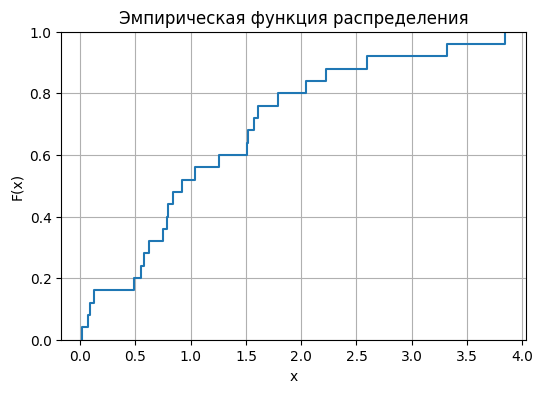

In [119]:
plt.figure(figsize=(6, 4))
plt.ecdf(sample)
plt.title('Эмпирическая функция распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()

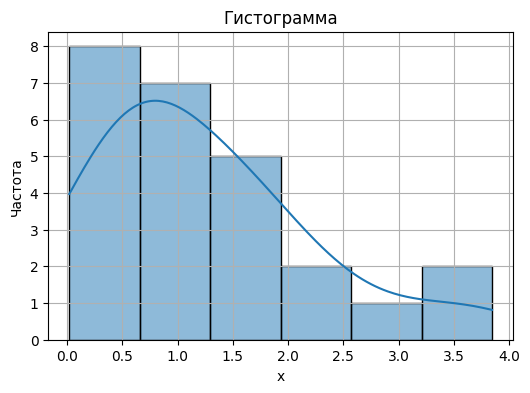

In [120]:
plt.figure(figsize=(6, 4))
sns.histplot(sample, kde=True)
plt.title('Гистограмма')
plt.xlabel('x')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

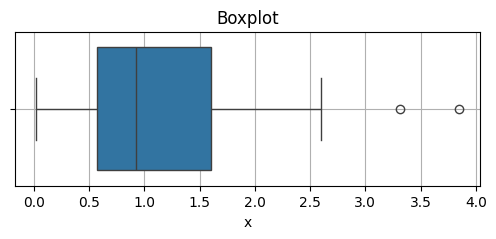

In [121]:
plt.figure(figsize=(6, 2))
sns.boxplot(x=sample, orient='h')
plt.title('Boxplot')
plt.xlabel('x')
plt.grid(True)
plt.show()

## c
Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученной с помощью ЦПТ, с бутстраповской оценкой этой плотности.

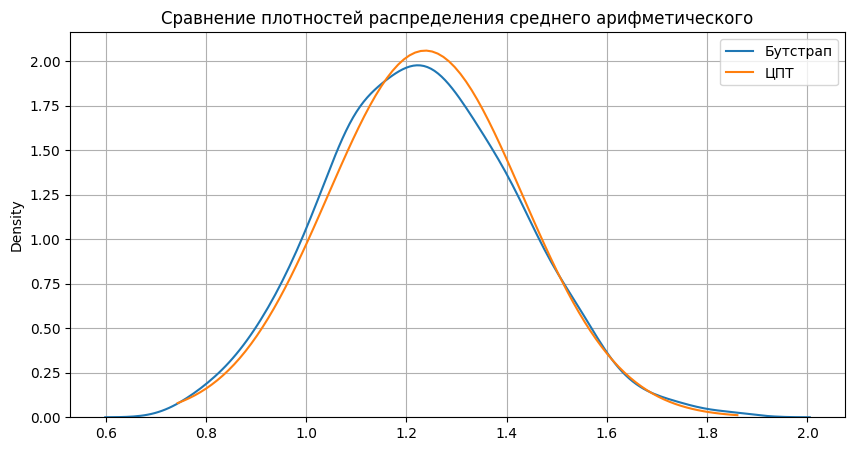

In [122]:
bootstrap_means = [np.mean(resample(sample)) for _ in range(1000)]
clt_mean = np.mean(sample)
clt_std = np.std(sample) / np.sqrt(n)
x = np.linspace(min(bootstrap_means), max(bootstrap_means), 100)

plt.figure(figsize=(10, 5))
sns.kdeplot(bootstrap_means, label='Бутстрап')
plt.plot(x, ss.norm.pdf(x, clt_mean, clt_std), label='ЦПТ')
plt.title('Сравнение плотностей распределения среднего арифметического')
plt.legend()
plt.grid(True)
plt.show()


## d
Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценкить вероятность того, что коэффициент асимметрии будет меньше 1.

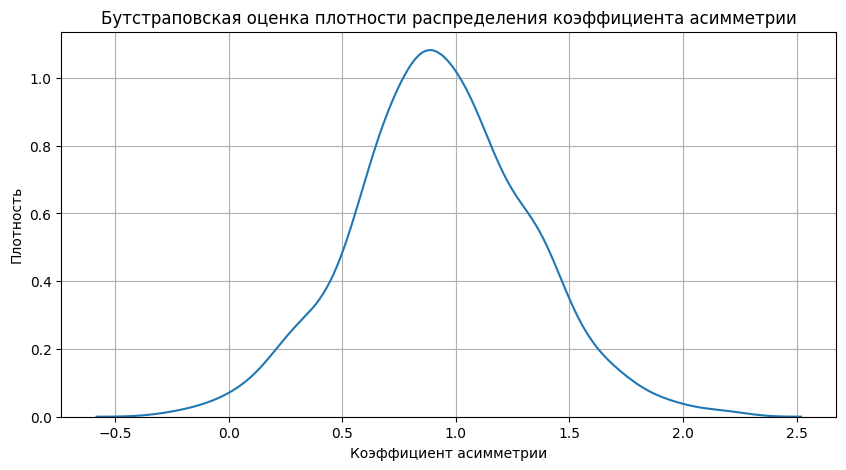

Вероятность того, что коэффициент асимметрии будет меньше 1: 0.58


In [123]:
bootstrap_skewness = [ss.skew(resample(sample)) for _ in range(1000)]
prob = np.mean(np.array(bootstrap_skewness) < 1)

plt.figure(figsize=(10, 5))
sns.kdeplot(bootstrap_skewness)
plt.title('Бутстраповская оценка плотности распределения коэффициента асимметрии')
plt.xlabel('Коэффициент асимметрии')
plt.ylabel('Плотность')
plt.grid(True)
plt.show()

print(f"Вероятность того, что коэффициент асимметрии будет меньше 1: {prob}")

## e
Сравнить плотность распределения медианы выборки с бутстраповской оценкой этой плотности

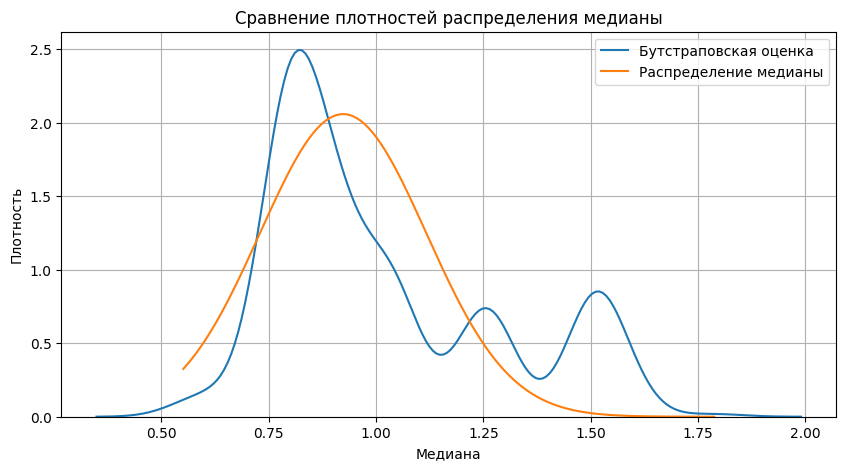

In [124]:
bootstrap_medians = [np.median(np.random.choice(sample, size=n, replace=True)) for _ in range(1000)]

x = np.linspace(min(bootstrap_medians), max(bootstrap_medians), 1000)
y = ss.norm.pdf(x, np.median(sample), np.std(sample) / np.sqrt(n))

plt.figure(figsize=(10, 5))
sns.kdeplot(bootstrap_medians, label='Бутстраповская оценка')
plt.plot(x, y, label='Распределение медианы')

plt.title('Сравнение плотностей распределения медианы')
plt.xlabel('Медиана')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()